In [ ]:
import numpy as np
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
!pip install mlrose
import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
!pip install sompy
!pip install git+https://github.com/compmonks/SOMPY.git
!pip install ipdb==0.8.1
import sompy
from sompy.sompy import SOMFactory
from PIL import Image
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sompy: filename=sompy-0.1.1-py2.py3-none-any.whl size=3084 sha256=aca4daeb936dc95ae40d50de7012e9b1820395a4f967dd73030b9a744c0a43bf
  Stored in directory: /root/.cache/pip/wheels/e0/93/8c/ff042b6386b17bf7751db3c0ea76db7afb88ded186672f3a3e
Successfully built sompy


In [ ]:
# читаем данные
dataset = pd.read_csv("/my_small.csv")
print(np.shape(dataset))
dataset = dataset.drop(columns=['word', 'tag'], axis=1)

dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]

print(np.shape(dataset))
dataset = dataset.fillna(0)#заменяем нан на 0
print(dataset)
dataset = dataset.to_numpy()
print(type(dataset))

(16982, 110)
(16982, 107)
       sent_id  word_id_in_sent  head_id  part_of_speech_ADP  \
0            0                1        7                   0   
1            0                2        4                   1   
2            0                3        4                   0   
3            0                4        1                   0   
4            0                5        1                   0   
...        ...              ...      ...                 ...   
16977      109               25       26                   1   
16978      109               26       17                   0   
16979      109               27       29                   0   
16980      109               28       29                   1   
16981      109               29       26                   0   

       part_of_speech_ADV  part_of_speech_AUX  part_of_speech_CCONJ  \
0                       0                   0                     0   
1                       0                   0                  

In [ ]:
mapsize = [107,107]
#print(dataset)

som = sompy.SOMFactory.build(dataset, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  

#print(dataset)
#print(np.shape(dataset))


som.train(n_job=1, train_rough_len=50, train_finetune_len=50)  # verbose='debug' will print more, and verbose=None wont print 

topographic_error = som.calculate_topographic_error() ## Quality of the map itself, SOM nodes themselves
quantization_error = np.mean(som._bmu[1]) ## Quality of the affectation of our observations to each node in the SOM map
print('Topographic error = %s; Quantization error = %s' % (topographic_error, quantization_error))

 Training...
 pca_linear_initialization took: 0.501000 seconds
 Rough training...
 radius_ini: 14.000000 , radius_final: 3.500000, trainlen: 50

 epoch: 1 ---> elapsed time:  21.702000, quantization error: 7.825793

 epoch: 2 ---> elapsed time:  16.828000, quantization error: 7.523252

 epoch: 3 ---> elapsed time:  15.251000, quantization error: 6.765531

 epoch: 4 ---> elapsed time:  15.114000, quantization error: 6.032195

 epoch: 5 ---> elapsed time:  15.533000, quantization error: 5.874876

 epoch: 6 ---> elapsed time:  15.087000, quantization error: 5.775176

 epoch: 7 ---> elapsed time:  15.217000, quantization error: 5.712747

 epoch: 8 ---> elapsed time:  15.812000, quantization error: 5.670650

 epoch: 9 ---> elapsed time:  16.206000, quantization error: 5.630275

 epoch: 10 ---> elapsed time:  15.322000, quantization error: 5.588475

 epoch: 11 ---> elapsed time:  15.722000, quantization error: 5.544576

 epoch: 12 ---> elapsed time:  15.309000, quantization error: 5.491961



Topographic error = 0.40171946767165234; Quantization error = 0.7611355250211382


In [ ]:

from sompy.visualization.mapview import View2D

v = sompy.mapview.View2DPacked(5, 5, 'test',text_size=8)  
#v.show(som, what='codebook',   col_sz=91)
#plt.show()
map_labels = som.cluster(n_clusters=7)
data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]]) # mapping labels from grid to original data
print(data_labels.shape)
data_labels






(16982,)


array([4, 4, 4, ..., 1, 1, 3], dtype=int32)

/usr/local/lib/python3.7/dist-packages/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


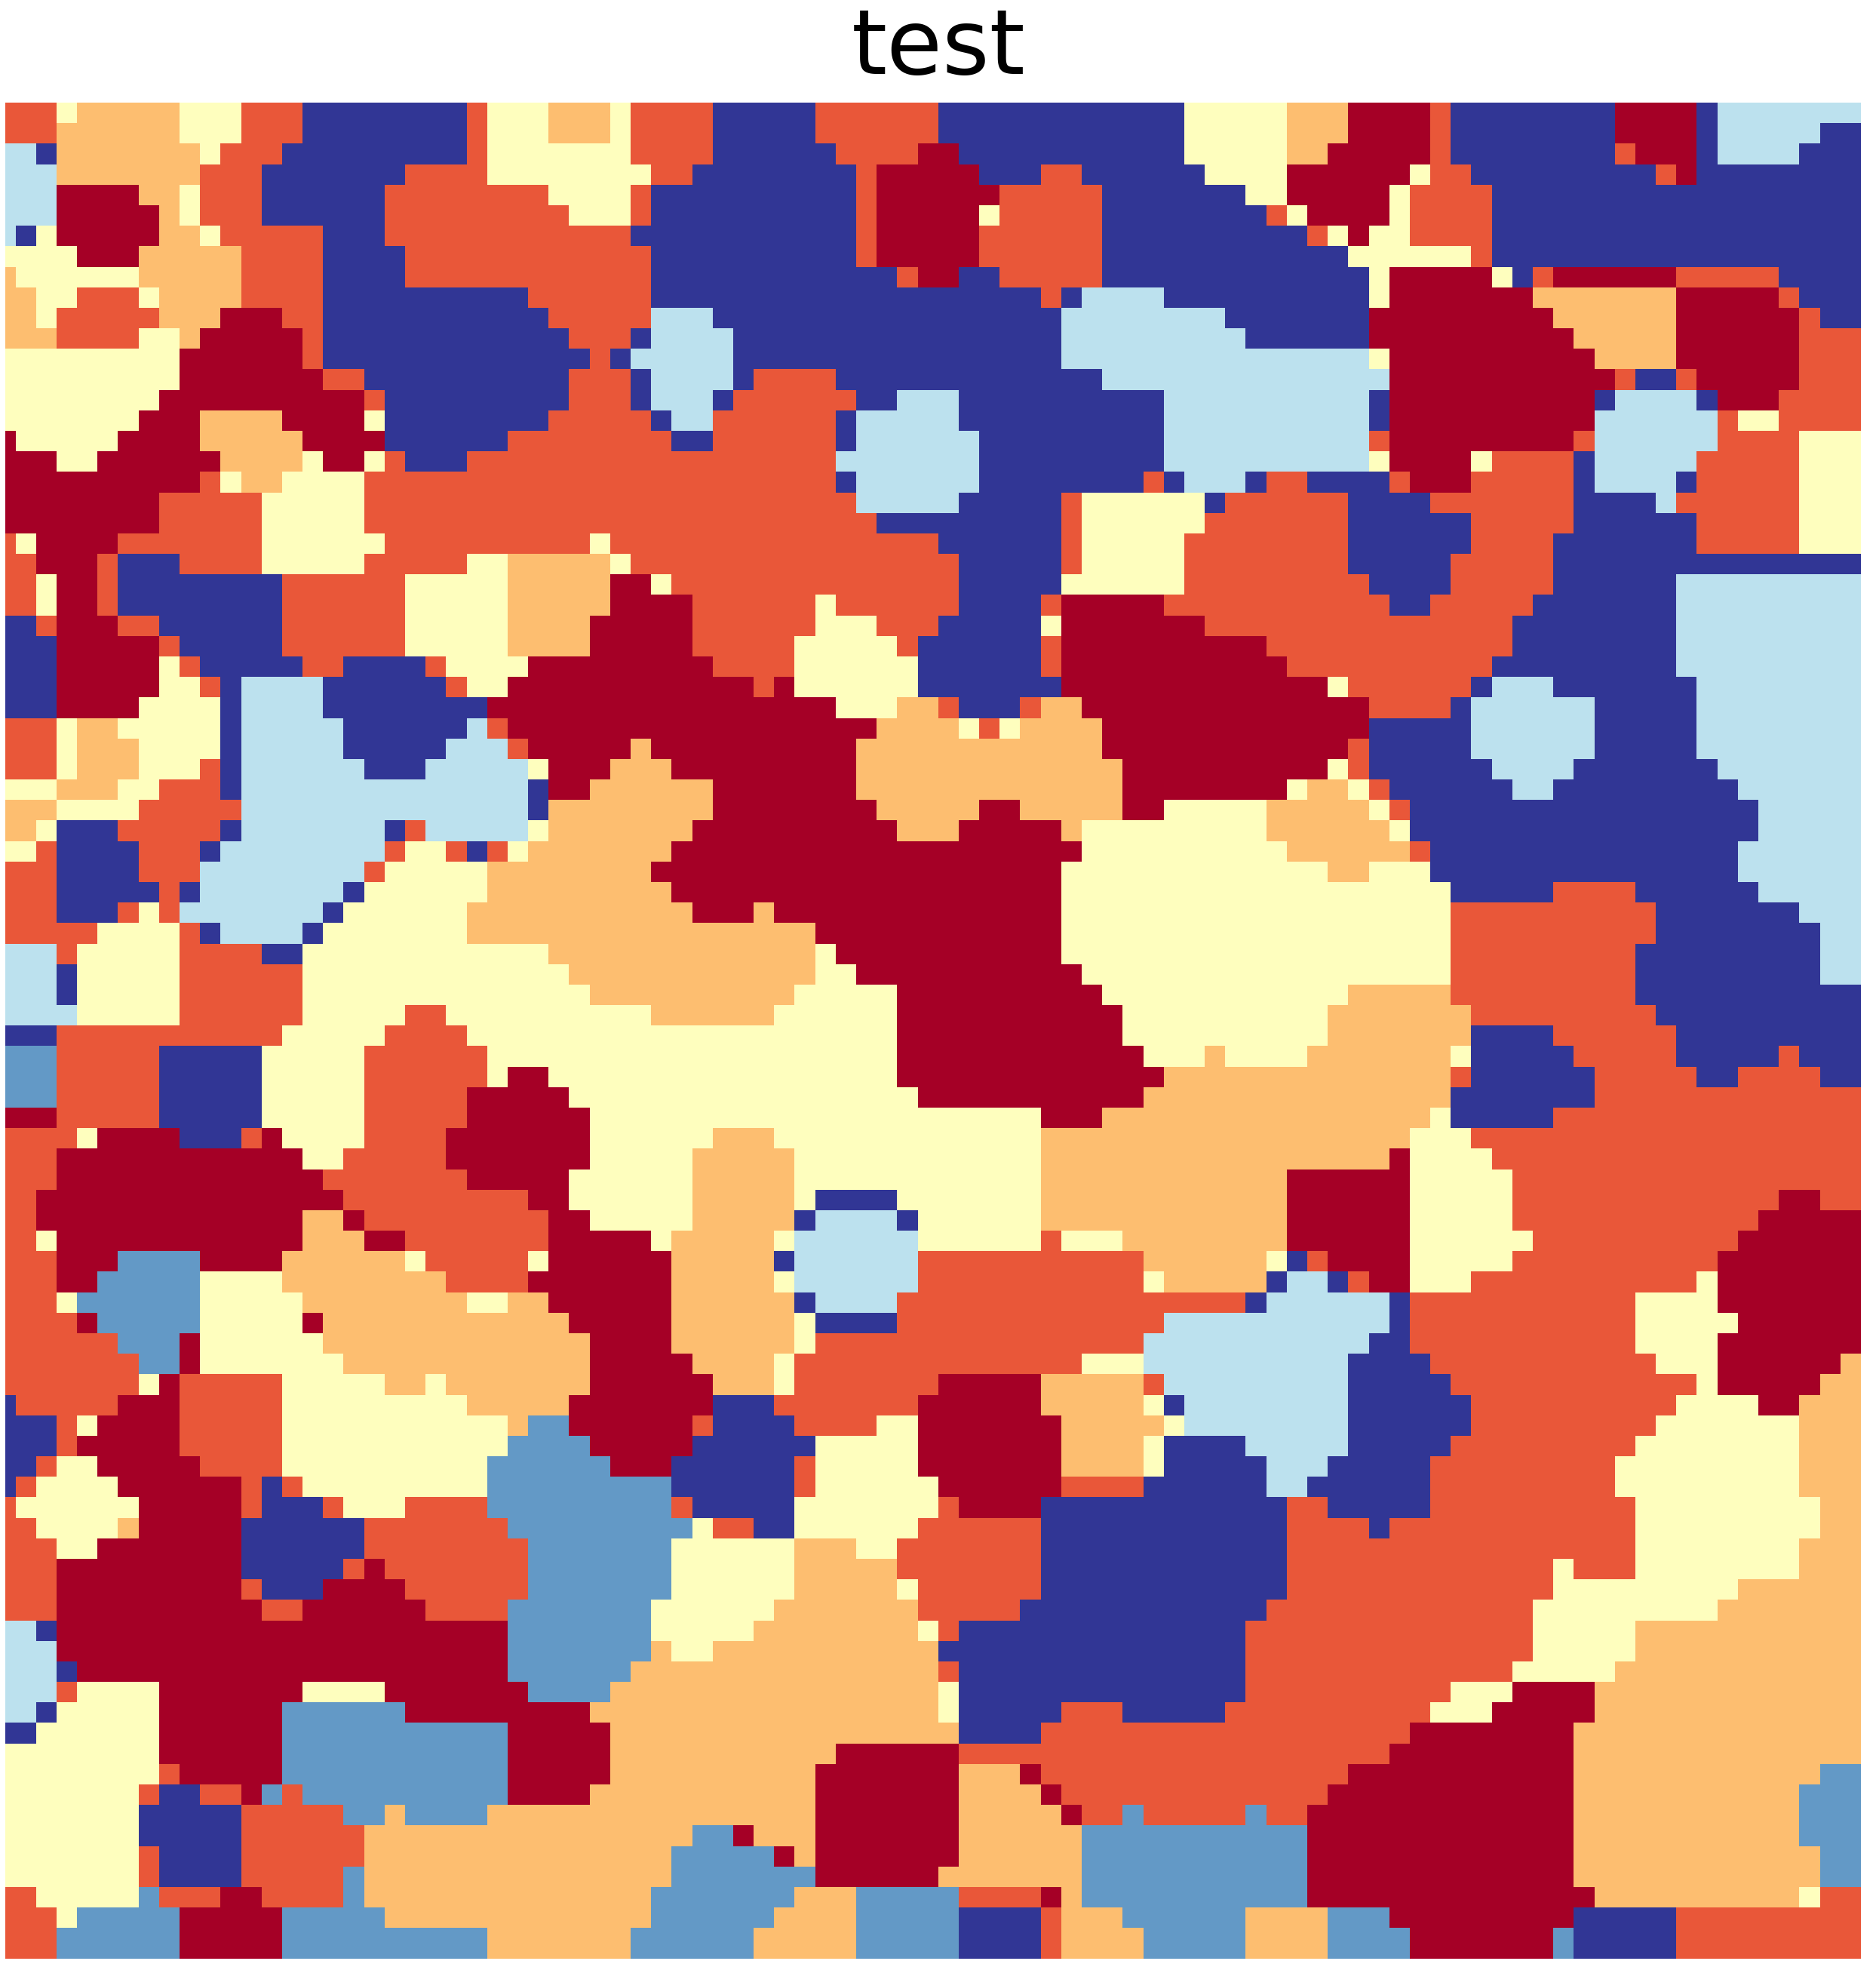

In [ ]:
v.show(som, what='cluster')

/usr/local/lib/python3.7/dist-packages/sompy/visualization/hitmap.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


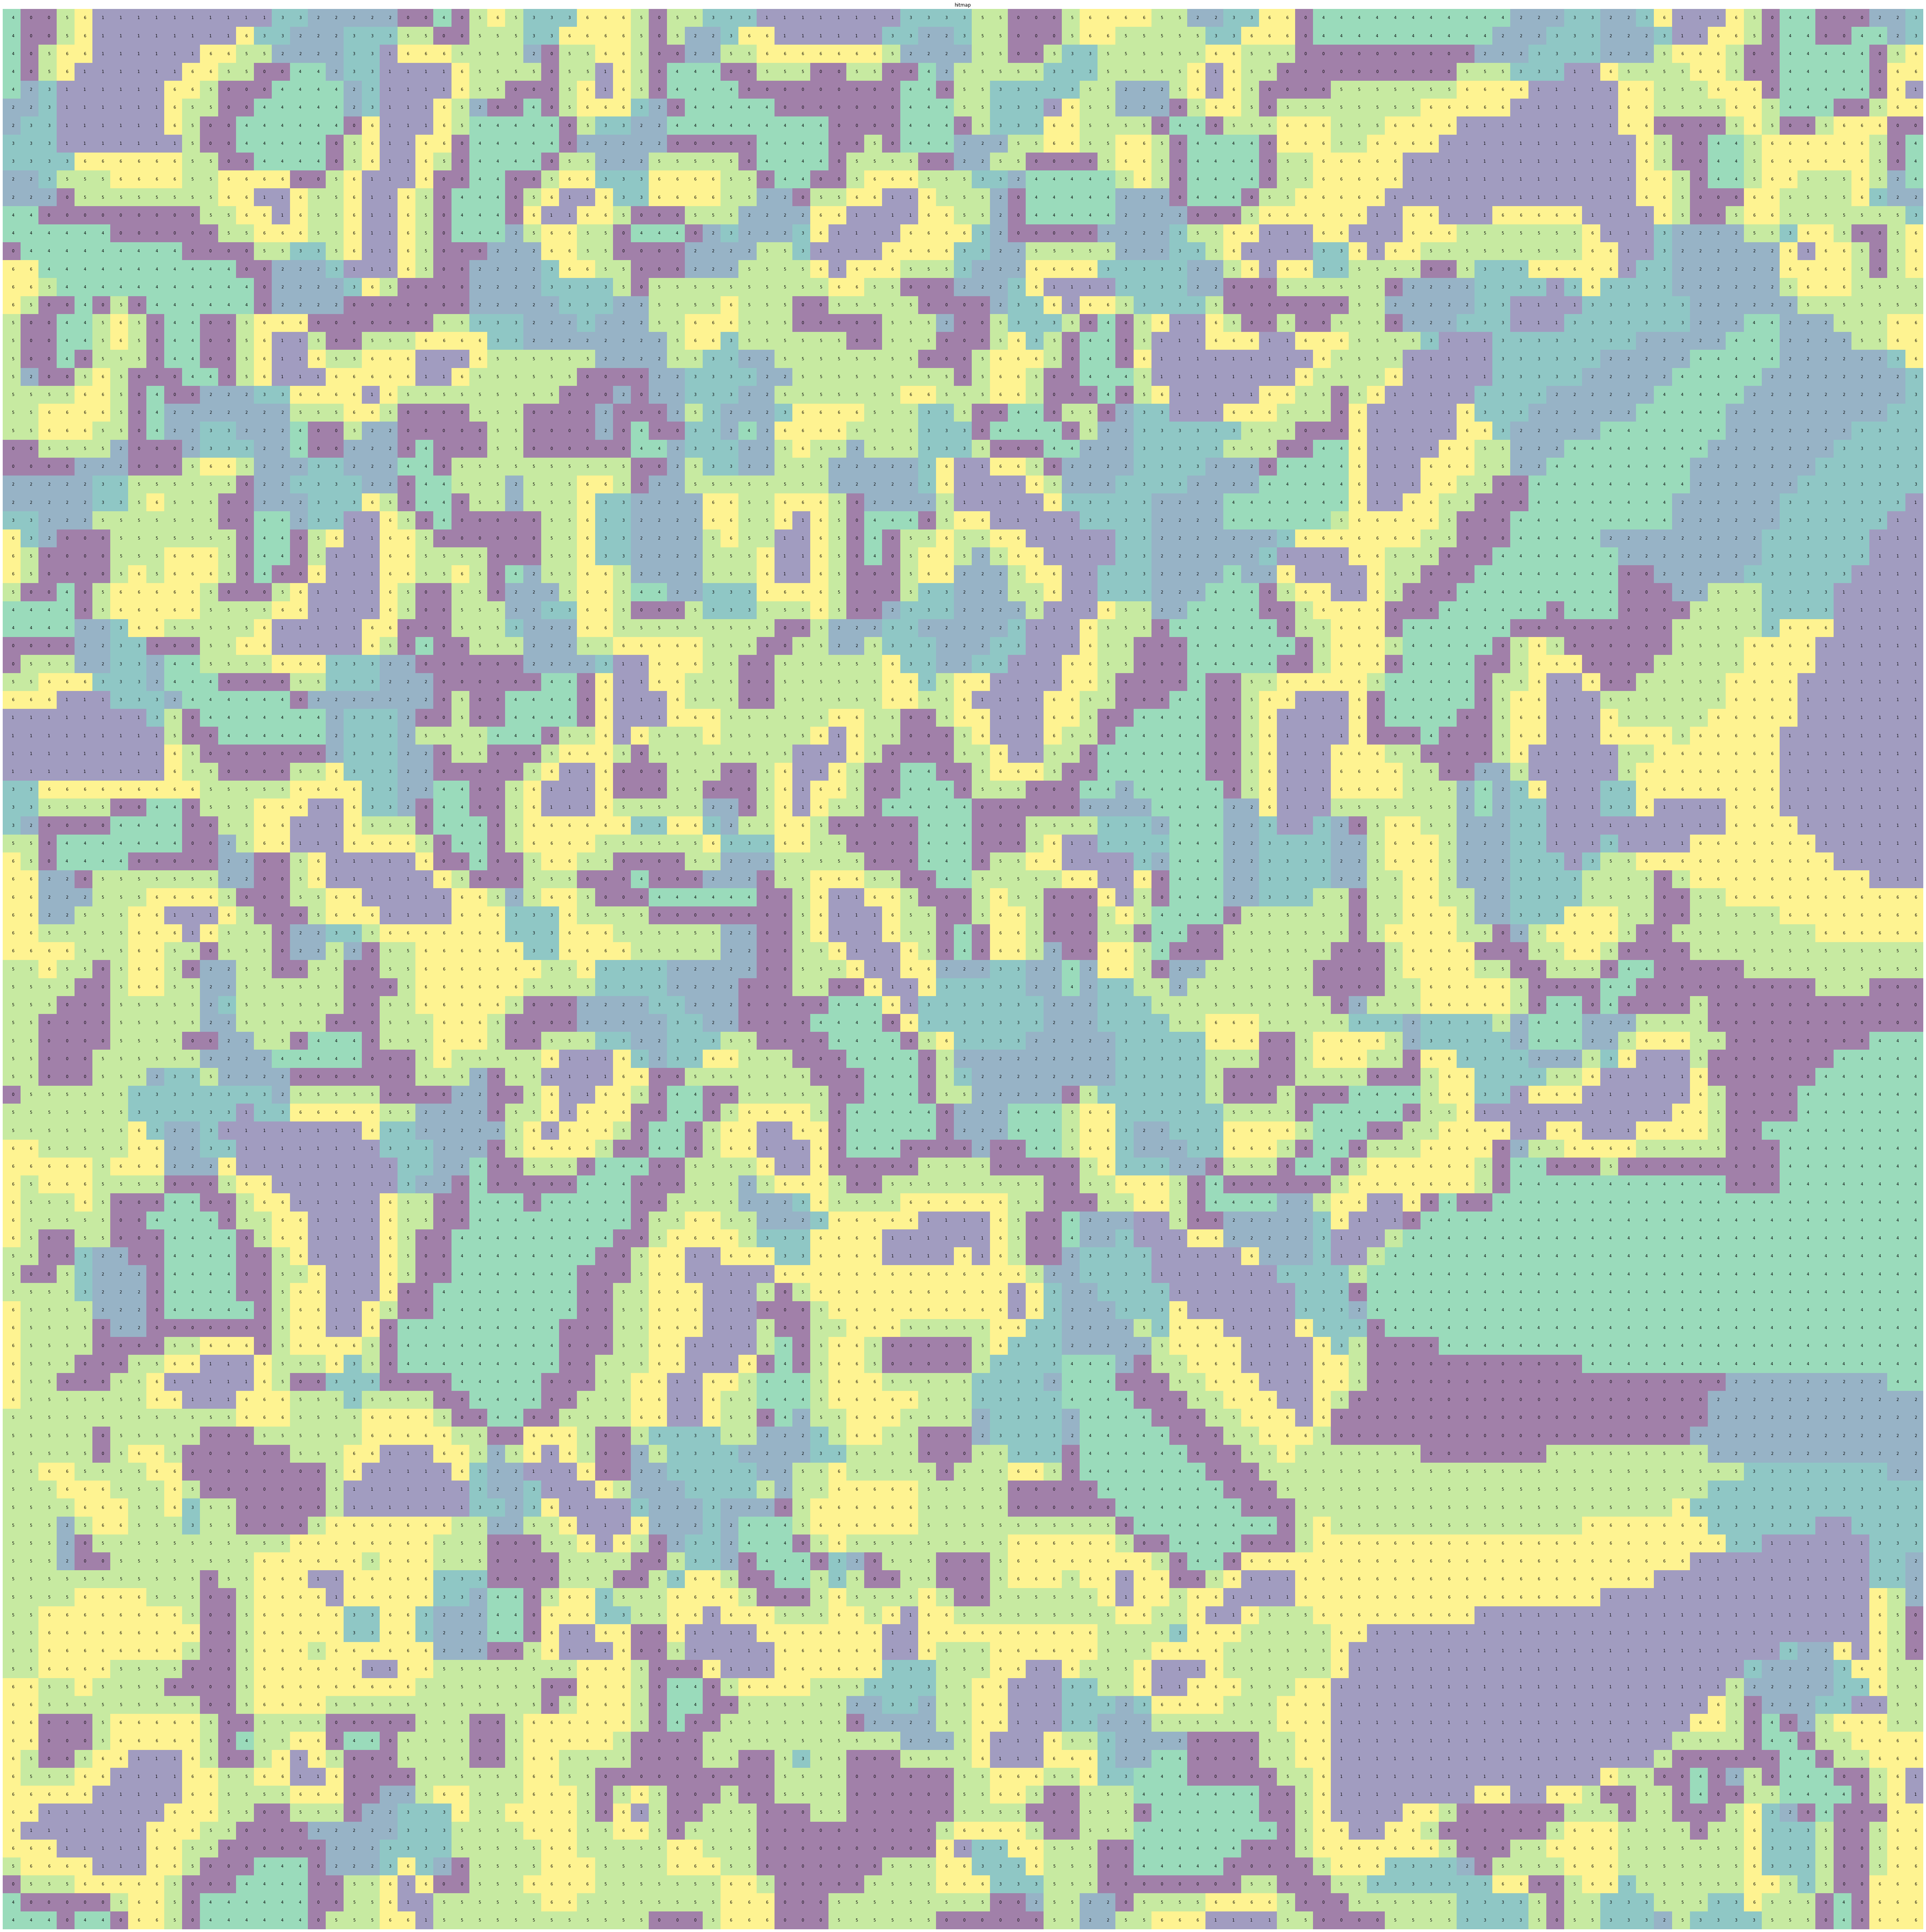

array([[    0,     0,     0],
       [    0,     1,     1],
       [    0,     2,     2],
       ...,
       [  106,   104, 11446],
       [  106,   105, 11447],
       [  106,   106, 11448]])

In [ ]:


h = sompy.hitmap.HitMapView(91, 91, 'hitmap', text_size=100, show_text=True)
h.show(som)




In [ ]:
# читаем данные
pf = pd.read_csv("/my_small.csv")
print(np.shape(pf))

pf = pf.loc[:, ~pf.columns.str.contains('^Unnamed')]
words=pf[['word','tag']].copy()
print(words)

len(words) 
len(data_labels) 
words_in_clusters = pd.DataFrame(np.column_stack([words, data_labels]), 
                               columns=['Word',  'Tag','Cluster'])

words_in_clusters.head()


(16982, 110)
               word    tag
0      Вице-премьер      O
1                по      O
2        социальным      O
3          вопросам      O
4           Татьяна  B-PER
...             ...    ...
16977            на      O
16978        западе      O
16979             и      O
16980             в      O
16981       столице      O

[16982 rows x 2 columns]


,Word,Tag,Cluster
0,Вице-премьер,O,4
1,по,O,4
2,социальным,O,4
3,вопросам,O,0
4,Татьяна,B-PER,0


In [ ]:
d1={'O':0, 'B-LOC':0,'I-LOC':0, 'B-ORG':0, 'I-ORG':0, 'B-PER':0, 'I-PER':0, 'count': 0 }
d2={'O':0, 'B-LOC':0,'I-LOC':0, 'B-ORG':0, 'I-ORG':0, 'B-PER':0, 'I-PER':0, 'count': 0 }
d3={'O':0, 'B-LOC':0,'I-LOC':0, 'B-ORG':0, 'I-ORG':0, 'B-PER':0, 'I-PER':0, 'count': 0 }
d4={'O':0, 'B-LOC':0,'I-LOC':0, 'B-ORG':0, 'I-ORG':0, 'B-PER':0, 'I-PER':0, 'count': 0 }
d5={'O':0, 'B-LOC':0,'I-LOC':0, 'B-ORG':0, 'I-ORG':0, 'B-PER':0, 'I-PER':0, 'count': 0 }
d6={'O':0, 'B-LOC':0,'I-LOC':0, 'B-ORG':0, 'I-ORG':0, 'B-PER':0, 'I-PER':0, 'count': 0 }
d7={'O':0, 'B-LOC':0,'I-LOC':0, 'B-ORG':0, 'I-ORG':0, 'B-PER':0, 'I-PER':0, 'count': 0 }

Cluster_to_look_into = 0

for index,row in words_in_clusters.iterrows():
  #print(row)
  #print(row['Cluster'])
  if row['Cluster']==Cluster_to_look_into:
    d1[row['Tag']]+=1
    d1["count"]+=1
   # print(row['Tag'])
    #print(d1[row['Tag']])
   # print(d1["count"])

Cluster_to_look_into = 1

for index,row in words_in_clusters.iterrows():

  if row['Cluster']==Cluster_to_look_into:
    d2[row['Tag']]+=1
    d2["count"]+=1

Cluster_to_look_into = 2

for index,row in words_in_clusters.iterrows():

  if row['Cluster']==Cluster_to_look_into:
    d3[row['Tag']]+=1
    d3["count"]+=1

Cluster_to_look_into = 3

for index,row in words_in_clusters.iterrows():

  if row['Cluster']==Cluster_to_look_into:
    d4[row['Tag']]+=1
    d4["count"]+=1

Cluster_to_look_into = 4

for index,row in words_in_clusters.iterrows():

  if row['Cluster']==Cluster_to_look_into:
    d5[row['Tag']]+=1
    d5["count"]+=1
  
Cluster_to_look_into = 5

for index,row in words_in_clusters.iterrows():

  if row['Cluster']==Cluster_to_look_into:
    d6[row['Tag']]+=1
    d6["count"]+=1
  

Cluster_to_look_into = 6

for index,row in words_in_clusters.iterrows():

  if row['Cluster']==Cluster_to_look_into:
    d7[row['Tag']]+=1
    d7["count"]+=1

print(d1)
print(d2)
print(d3)
print(d4)
print(d5)
print(d6)
print(d7)



{'O': 2361, 'B-LOC': 108, 'I-LOC': 10, 'B-ORG': 118, 'I-ORG': 111, 'B-PER': 113, 'I-PER': 45, 'count': 2866}
{'O': 2608, 'B-LOC': 24, 'I-LOC': 13, 'B-ORG': 30, 'I-ORG': 46, 'B-PER': 28, 'I-PER': 20, 'count': 2769}
{'O': 1225, 'B-LOC': 70, 'I-LOC': 9, 'B-ORG': 49, 'I-ORG': 82, 'B-PER': 47, 'I-PER': 29, 'count': 1511}
{'O': 1038, 'B-LOC': 22, 'I-LOC': 3, 'B-ORG': 29, 'I-ORG': 38, 'B-PER': 8, 'I-PER': 2, 'count': 1140}
{'O': 2234, 'B-LOC': 63, 'I-LOC': 6, 'B-ORG': 68, 'I-ORG': 97, 'B-PER': 33, 'I-PER': 32, 'count': 2533}
{'O': 2820, 'B-LOC': 86, 'I-LOC': 6, 'B-ORG': 116, 'I-ORG': 95, 'B-PER': 99, 'I-PER': 41, 'count': 3263}
{'O': 2590, 'B-LOC': 73, 'I-LOC': 6, 'B-ORG': 84, 'I-ORG': 64, 'B-PER': 44, 'I-PER': 39, 'count': 2900}


In [ ]:
print("Процент содержания слов в каждом кластрере:")
print("Кластер 1")
print('Tag: O - ', d1['O']/d1['count'])
print('Tag: B-LOC - ', d1['B-LOC']/d1['count'])
print('Tag: I-LOC - ', d1['I-LOC']/d1['count'])
print('Tag: B-ORG - ', d1['B-ORG']/d1['count'])
print('Tag: I-ORG - ', d1['I-ORG']/d1['count'])
print('Tag: B-PER - ', d1['B-PER']/d1['count'])
print('Tag: I-PER - ', d1['I-PER']/d1['count'])

print("Кластер 2")
print('Tag: O - ', d2['O']/d2['count'])
print('Tag: B-LOC - ', d2['B-LOC']/d2['count'])
print('Tag: I-LOC - ', d2['I-LOC']/d2['count'])
print('Tag: B-ORG - ', d2['B-ORG']/d2['count'])
print('Tag: I-ORG - ', d2['I-ORG']/d2['count'])
print('Tag: B-PER - ', d2['B-PER']/d2['count'])
print('Tag: I-PER - ', d2['I-PER']/d2['count'])

print("Кластер 3")
print('Tag: O - ', d3['O']/d3['count'])
print('Tag: B-LOC - ', d3['B-LOC']/d3['count'])
print('Tag: I-LOC - ', d3['I-LOC']/d3['count'])
print('Tag: B-ORG - ', d3['B-ORG']/d3['count'])
print('Tag: I-ORG - ', d3['I-ORG']/d3['count'])
print('Tag: B-PER - ', d3['B-PER']/d3['count'])
print('Tag: I-PER - ', d3['I-PER']/d3['count'])

print("Кластер 4")
print('Tag: O - ', d4['O']/d4['count'])
print('Tag: B-LOC - ', d4['B-LOC']/d4['count'])
print('Tag: I-LOC - ', d4['I-LOC']/d4['count'])
print('Tag: B-ORG - ', d4['B-ORG']/d4['count'])
print('Tag: I-ORG - ', d4['I-ORG']/d4['count'])
print('Tag: B-PER - ', d4['B-PER']/d4['count'])
print('Tag: I-PER - ', d4['I-PER']/d4['count'])

print("Кластер 5")
print('Tag: O - ', d5['O']/d5['count'])
print('Tag: B-LOC - ', d5['B-LOC']/d5['count'])
print('Tag: I-LOC - ', d3['I-LOC']/d5['count'])
print('Tag: B-ORG - ', d5['B-ORG']/d5['count'])
print('Tag: I-ORG - ', d5['I-ORG']/d5['count'])
print('Tag: B-PER - ', d5['B-PER']/d5['count'])
print('Tag: I-PER - ', d5['I-PER']/d5['count'])

print("Кластер 6")
print('Tag: O - ', d6['O']/d6['count'])
print('Tag: B-LOC - ', d6['B-LOC']/d6['count'])
print('Tag: I-LOC - ', d6['I-LOC']/d6['count'])
print('Tag: B-ORG - ', d6['B-ORG']/d6['count'])
print('Tag: I-ORG - ', d6['I-ORG']/d6['count'])
print('Tag: B-PER - ', d6['B-PER']/d6['count'])
print('Tag: I-PER - ', d6['I-PER']/d6['count'])

print("Кластер 7")
print('Tag: O - ', d7['O']/d7['count'])
print('Tag: B-LOC - ', d7['B-LOC']/d7['count'])
print('Tag: I-LOC - ', d7['I-LOC']/d7['count'])
print('Tag: B-ORG - ', d7['B-ORG']/d7['count'])
print('Tag: I-ORG - ', d7['I-ORG']/d7['count'])
print('Tag: B-PER - ', d7['B-PER']/d7['count'])
print('Tag: I-PER - ', d7['I-PER']/d7['count'])


Процент содержания слов в каждом кластрере:
Кластер 1
Tag: O -  0.8237962316817865
Tag: B-LOC -  0.03768318213538032
Tag: I-LOC -  0.0034891835310537334
Tag: B-ORG -  0.041172365666434056
Tag: I-ORG -  0.03872993719469644
Tag: B-PER -  0.03942777390090719
Tag: I-PER -  0.0157013258897418
Кластер 2
Tag: O -  0.9418562657999278
Tag: B-LOC -  0.00866738894907909
Tag: I-LOC -  0.004694835680751174
Tag: B-ORG -  0.010834236186348862
Tag: I-ORG -  0.016612495485734922
Tag: B-PER -  0.010111953773925604
Tag: I-PER -  0.007222824124232575
Кластер 3
Tag: O -  0.8107213765718068
Tag: B-LOC -  0.04632693580410324
Tag: I-LOC -  0.005956320317670417
Tag: B-ORG -  0.03242885506287227
Tag: I-ORG -  0.054268696227663796
Tag: B-PER -  0.031105228325612178
Tag: I-PER -  0.019192587690271344
Кластер 4
Tag: O -  0.9105263157894737
Tag: B-LOC -  0.01929824561403509
Tag: I-LOC -  0.002631578947368421
Tag: B-ORG -  0.02543859649122807
Tag: I-ORG -  0.03333333333333333
Tag: B-PER -  0.007017543859649123
Tag: 